### IDs:
Insert yours IDs to the cell below

ID #1: 311341879

ID #2: 039065313


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

There are 506 samples in the dataset
There are 13+1 features for each sample
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Plus another ['MEDV']
['MEDV']   float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object



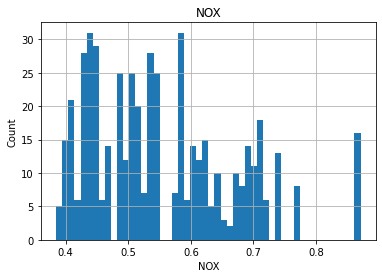

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats


from sklearn.datasets import load_boston

content= load_boston()

#Q1
features = content['feature_names']
data = content['data']
extra = content.target
print("There are "+ str(len(data))+" samples in the dataset")
print("There are "+str(len(features))+ "+1 features for each sample")
print(features)
print("Plus another ['MEDV']")
df = pd.DataFrame(data,columns=features)
print("['MEDV']   " + str(extra.dtype))
print(df.dtypes)
# Nox index = 4
Nox = df['NOX']

#Q2
pd.DataFrame(Nox).hist(bins=50)
plt.title("NOX")
plt.xlabel("NOX")
plt.ylabel("Count")
print("")




We can see from the box plot that the lower bound is a lot closer to the mean than the upper bound in max values and in QID 


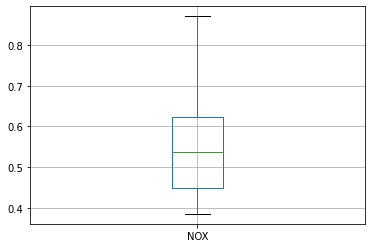

In [13]:
#Q2
pd.DataFrame(Nox).boxplot()
print("We can see from the box plot that the lower bound is a lot closer to the mean than the upper bound in max values and in QID ") 

A feature with unusual behaviour is CHAS that has a near zero correlation with all other features


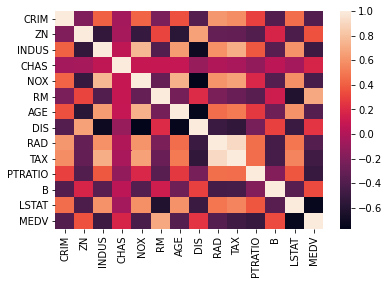

In [14]:
#Q3
df = pd.DataFrame(np.concatenate((data, extra[:, np.newaxis]), axis=1), columns= list(features) + ['MEDV'])
#print(df)
sn.heatmap(df.corr())

print("A feature with unusual behaviour is CHAS that has a near zero correlation with all other features")

In [15]:
#Q4
x = df.corr()[df.corr() < 1 ]
#print(x)
print(abs(x).max())
print("RAD and TAX are the most correlated (0.910228) followed by NOX and DIS (0.769230)")

CRIM       0.625505
ZN         0.664408
INDUS      0.763651
CHAS       0.175260
NOX        0.769230
RM         0.695360
AGE        0.747881
DIS        0.769230
RAD        0.910228
TAX        0.910228
PTRATIO    0.507787
B          0.444413
LSTAT      0.737663
MEDV       0.737663
dtype: float64
RAD and TAX are the most correlated (0.910228) followed by NOX and DIS (0.769230)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DIS vs. NOX')

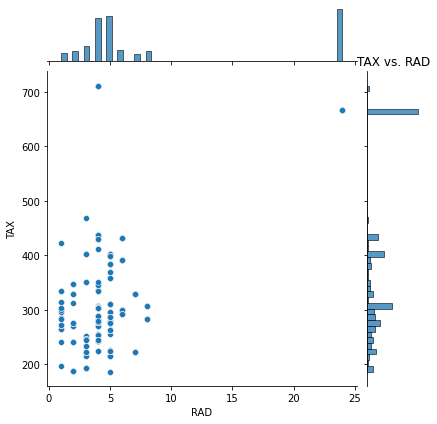

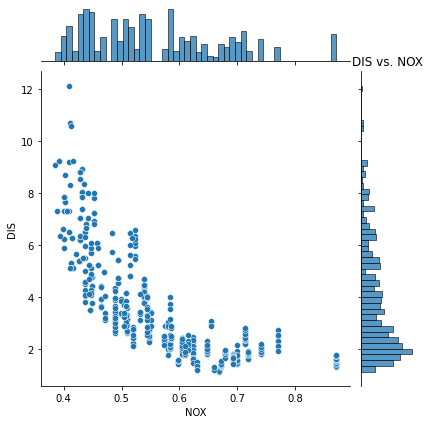

In [16]:
#Q4
sn.jointplot(df['RAD'],df['TAX'],marginal_kws = dict(bins=50))
plt.title("TAX vs. RAD")
sn.jointplot(df['NOX'],df['DIS'],marginal_kws = dict(bins=50))
plt.title("DIS vs. NOX")


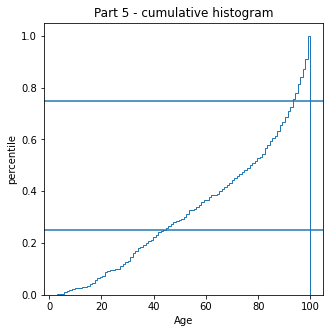

In [17]:
#Q5
Age = df['AGE']

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Part 5 - cumulative histogram')
ax.set_xlabel('Age')
ax.set_ylabel('percentile')

plt.axhline(0.25)
plt.axhline(0.75)
# plot the cumulative histogram
n, bins, patches = ax.hist(Age, 100, density=True, histtype='step',
                           cumulative=True, label='Empirical')


Q6 - 
Two interesting trends in the data: 

1) The TAX and RAD features are highly correlated but also have similar correlation with all other features

2) Median value of owner-occupied homes in $1000's (MEDV) has a negative correlation with - % lower status of the population (LSTAT)

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

Answer:</br> No we can't Proof: Be $X~(X_1,X_2,X_3)$, by the definition each two pairs of xi are pairwise independent. Like we saw in class this means that their covariance-matrix is diagonal, and also that by using the the probability density function (pdf) of a multivariate normal:

${\displaystyle f(\mathbf {x} )={\frac {1}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\exp \left(-{1 \over 2}(\mathbf {x} -{\boldsymbol {\mu }})^{\rm {T}}{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}f(\mathbf{x})= \frac{1}{\sqrt { (2\pi)^k|\boldsymbol \Sigma| } }  \exp\left(-{1 \over 2} (\mathbf{x}-\boldsymbol\mu)^{\rm T} \boldsymbol\Sigma^{-1} ({\mathbf x}-\boldsymbol\mu)\right)$

We get that: $P(X;\mu,\Sigma) = P(X_1;\mu_1,\sigma_1) = P(X_2;\mu_2,\sigma_2) = P(X_3,\mu_3,\sigma_3)$</br> Which gives us a conclusion that $X_1,X_2,X_3$ must be collectively independent as well.

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Answer:</br>

$\sum _{i1=1}^{n}\sum _{i2=1}^{m}\sum _{i2=1}^{k}\mathrm {P} (X=x_{i1},Y=y_{i2} ,Z=z_{i3})=1 \Rightarrow \text{we have }n\cdot m\cdot k\text{ parameters}\;$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

In this case it's n+m+k



#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$\text{In this case it's: }(n+m) \cdot k$ </br> Because for every value of Z, X and Y are independent.



#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

A box contains two coins: </br> a regular coin and one fake two-headed coin (P(H)=1). </br> We define the following events.

A= First coin toss results in an H. B= Second coin toss results in an H. C= Coin 1 (regular) has been selected.

We will now show that P(A∩B|C) = P(A|C)P(B|C)

We have $P(A|C)=P(B|C)=\frac{1}{2}$. Also, given that Coin 1 is selected, we have $P(A∩B|C)=\frac{1}{2}\frac{1}{2}=\frac{1}{4}$. And so P(A∩B|C) = P(A|C)P(B|C)

In order to show that it only conditionaly independent and not independent, we will need to show that. P(A∩B)≠P(A)P(B)

$P(A∩B) = P(A∩B|C)P(C)+P(A∩B|Not C)P(Not C) = P(A|C)P(B|C)P(C) + P(A|Not C)P(B|Not C)P(Not C) = \frac{1}{2}\frac{1}{2}\frac{1}{2}+1 \cdot 1 \cdot \frac{1}{2} = \frac{5}{8}$</br> $P(A) = P(A|C)P(C)+P(A|Not C)P(Not C) = \frac{1}{2}\frac{1}{2} + 1\frac{1}{2} = \frac{3}{4}$</br> $P(A) = P(B|C)P(C)+P(B|Not C)P(Not C) = \frac{1}{2}\frac{1}{2} + 1\frac{1}{2} = \frac{3}{4}$</br>

Meaning: P(A∩B)≠P(A)P(B), not independent.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#####Input GMD

In [7]:
GMDXLSX = [3.575252914	,
4.105491206	,
3.903642437	,
4.472249106	,
4.297265105	,
4.388162636	,
4.04877416	,
4.442805577	,
4.332521236	,
3.944043771	,
3.64688011	,
3.970587294	,
3.86152502	,
4.653872166	,
4.145837601	,
3.753235722	,
5.044603255	,
4.018764299	,
3.602495014	,
4.684670843	,
3.569270138	,
4.305095455	,
4.143541316	,
4.408949544	,
4.532512433	,
4.283545793	,
3.937498907	,
4.250560513	,
3.483841531	,
3.159031388	,
5.018576103	,
4.077095461	,
4.448729597	,
4.680372507	,
3.38269609	,
3.338040567	,
5.28742858	,
3.826926722	,
4.986076788	,
4.704232257	,
3.207964596	,
4.516367448	,
4.239704191	,
4.774584465	,
3.626906074	,
3.998137288	,
4.666946873	,
4.032317023	,
3.675406411	,
2.96983418	,
4.208534596	,
3.552245603	,
3.689881459	,
4.101792596	,
4.102284704	,
4.740349296	,
4.087246819	,
4.591016501	,
4.066252095	,
4.351202926	,
3.434136087	,
4.051167527	,
4.896406435	,
3.441064934	,
3.947344906	,
4.27408721	,
4.466123846	,
3.357966698	,
4.301164547	,
3.561701274	,
4.099930333	,
4.485097592	,
4.341141908	,
4.21386942	,
3.747509785	,
4.137420045	,
3.989867483	,
3.33738773	,
4.168857952	,
3.757320997	,
3.814233898	,
4.699903142	,
3.995866621	,
3.334574096	,
3.082516234	,
4.015056518	,
4.460170226	,
4.083977596	,
3.600450986	,
3.974367894	,
4.065967254	,
3.69401581	,
4.164358271	,
4.074834248	,
3.559559231	,
4.107568704	,
4.072172761	,
4.390381073	,
4.35735633	,
4.908486935	,
8.908890315	,
8.411664567	,
9.064391727	,
9.070874362	,
8.628775688	,
9.375878325	,
9.073896838	,
9.574653604	,
7.855091672	,
8.492862087	,
8.899316976	,
8.825116174	,
8.798559048	,
9.076778212	,
8.721343641	,
9.014511745	,
9.203039986	,
8.931147439	,
9.531817339	,
8.024112483	,
9.05221724	,
9.854725822	,
9.256481517	,
9.098809397	,
8.679278054	,
8.37822699	,
9.301313841	,
8.853223179	,
8.893552084	,
8.719222557	,
8.756740226	,
10.27944922	,
9.002551131	,
7.814278655	,
8.45008683	,
10.34611266	,
7.711749673	,
9.948538444	,
8.926544364	,
9.083772804	,
9.472067731	,
9.089384484	,
8.159775603	,
9.54744917	,
9.502427823	,
8.80638285	,
8.909157231	,
9.237412813	,
9.500742399	,
8.818690194	,
8.423703563	,
8.558034375	,
8.378401941	,
8.105779478	,
8.150098812	,
8.437792585	,
8.87039823	,
8.725568976	,
8.976749905	,
8.613996584	,
9.07190637	,
8.285419975	,
9.027586358	,
8.553759197	,
9.50602458	,
8.124607768	,
8.884630714	,
8.021167934	,
9.46357362	,
8.112589923	,
9.369650376	,
9.21569859	,
8.50949497	,
9.136414316	,
8.129345841	,
9.110678135	,
8.65843184	,
7.715736511	,
9.306632109	,
9.043707353	,
9.329646397	,
8.589131709	,
8.969149918	,
9.19004762	,
9.129083017	,
8.892675788	,
8.17242327	,
9.113310488	,
9.543491912	,
8.705851012	,
9.614806648	,
9.457082432	,
9.809339413	,
8.994712308	,
8.890674678	,
8.889014972	,
8.899399237	,
8.777454065	,
9.076721129	,
9.200866238	,
9.070641041	,
10.19515536	,
8.816033077	,
8.71498208	,
9.030910347	,
8.626812947	,
9.082359302	,
10.34157885	,
8.670056697	,
8.373326753	,
8.471463761	,
9.227788635	,
9.088655457	,
9.003372138	,
9.654300804	,
8.455399237	,
9.987310209	,
9.347460977	,
9.746319222	,
9.23944264	,
9.450760456	,
8.517787205	,
9.645434426	,
8.76940985	,
8.399974591	,
8.367085714	,
8.893829678	,
8.857029143	,
8.867078578	,
8.707385297	,
8.28315833	,
9.355766194	,
9.847873034	,
9.324802334	,
9.14158527	,
8.533919827	,
9.137748272	,
9.197948396	,
9.900799294	,
9.159462437	,
8.307590648	,
9.059116318	,
8.775656702	,
9.116373146	,
9.734880768	,
10.1347853	,
9.667458661	,
8.404414072	,
9.282281893	,
8.286627231	,
8.458645349	,
9.140269154	,
9.274489902	,
8.678136841	,
9.099267374	,
9.230017308	,
8.327005101	,
9.673708647	,
7.918356362	,
8.524693343	,
8.854235104	,
9.31354528	,
9.082746928	,
8.995090087	,
8.811256694	,
9.620633314	,
10.13464177	,
9.495340913	,
9.142308542	,
9.666303513	,
8.142713531	,
9.083380841	,
9.502291272	,
8.873777737	,
8.55504754	,
8.964029956	,
9.527944458	,
8.672892682	,
8.84526502	,
8.581044329	,
8.916825602	,
8.494387014	,
9.075280648	,
9.749360762	,
9.015444036	,
9.588230053	,
9.474824934	,
9.045174084	,
8.942669406	,
8.906288748	,
8.736533452	,
9.410107701	,
9.348330995	,
8.917430855	,
10.14208112	,
9.014470466	,
9.027480872	,
9.555642596	,
8.674075124	,
10.01051371	,
14.99959571	,
15.95276829	,
17.43958188	,
13.81649393	,
14.49721787	,
16.46809292	,
15.96519188	,
15.25255833	,
17.02466569	,
14.06585834	,
13.53312928	,
12.53702878	,
15.63357774	,
13.51811657	,
15.98836464	,
14.50777558	,
14.37578026	,
15.12264511	,
14.51597702	,
11.95870682	,
15.54848742	,
15.01794329	,
16.22365422	,
15.74750088	,
15.13179655	,
13.98267397	,
13.42721549	,
11.44513386	,
16.00367982	,
16.11881594	,
16.64227052	,
16.19884702	,
17.16077485	,
18.56236046	,
14.07284409	,
16.011442	,
13.54379979	,
16.10212799	,
15.50172821	,
16.19601244	,
15.43386707	,
14.14955666	,
13.65426557	,
15.56027936	,
14.19072747	,
15.82212306	,
15.4004507	,
17.24749929	,
14.0360176	,
15.8567981	,
14.51701903	,
13.70710223	,
12.94146874	,
13.90583068	,
13.63438125	,
15.5923211	,
14.24558443	,
17.11022282	,
16.75579767	,
14.72013018	,
15.32783414	,
16.65060473	,
13.9672901	,
14.08593151	,
13.52509432	,
15.72153956	,
13.88269888	,
12.87349507	,
14.41134508	,
15.48841292	,
10.9694469	,
17.0749042	,
15.16597077	,
12.33012806	,
16.32249852	,
14.663746	,
15.00430018	,
16.65515406	,
16.69079221	,
14.77093784	,
17.25045752	,
18.09861613	,
12.06300394	,
13.88076798	,
13.05091664	,
15.28844789	,
14.01667283	,
13.56903819	,
12.66471806	,
13.12843038	,
13.80297349	,
16.20269921	,
15.10975115	,
15.76780298	,
18.07544731	,
12.83264756	,
16.36855638	,
16.67634244	,
15.80790627	,
14.88178155	,
11.61047663	,
15.24566871	,
18.28986357	,
13.56097544	,
16.64561504	,
17.42312987	,
15.53330045	,
15.94989674	,
15.15944929	,
12.95054014	,
15.71842579	,
13.66394853	,
14.15091517	,
14.1940651	,
14.40156349	,
14.94759316	,
15.26755054	,
16.28998159	,
15.3173622	,
16.04905809	,
11.64434001	,
15.30957208	,
12.54030905	,
16.85390175	,
16.25564907	,
14.80833148	,
14.37636704	,
15.91454049	,
14.3311836	,
15.17921684	,
13.87893053	,
14.54230361	,
15.69949039	,
13.615059	,
13.46399997	,
14.80455398	,
15.21221691	,
13.99138791	,
14.18648025	,
14.27140335	,
18.5196495	,
12.02162555	,
15.08161944	,
14.88442283	,
17.98191011	,
16.63039954	,
14.09725843	,
14.31772764	,
17.32364966	,
15.53600636	,
15.00960555	,
15.88843921	,
14.03271403	,
14.52931845	,
15.86103599	,
15.89299038	,
17.04483021	,
15.75950893	,
15.40730953	,
12.00945504	,
12.9408721	,
13.24274699	,
16.00632951	,
15.0669061	,
18.1309304	,
14.54453287	,
14.54464132	,
15.17669405	,
14.59466901	,
18.69539195	,
13.89664016	,
16.23197718	,
16.87723441	,
15.76535967	,
14.7042566	,
15.61998355	,
16.25163579	,
15.370251	,
18.359871	,
15.78550052	,
14.45535731	,
14.50690224	,
14.35899892	,
15.98325971	,
13.30493981	,
13.91091186	,
15.82415559	,
15.16788926	,
14.84197608	,
14.2909135	,
16.93408558	,
15.14432648	,
16.43832831	,
16.34309941	,
14.28901358	,
16.34379404	,
14.60302952	,
14.57725273	,
14.41240969	,
13.99730378	,
15.53766686	,
13.21273926	,
14.44367346	,
13.80109207	,
16.04456502	,
14.78102598	,
16.41137888	,
14.09509157	,
17.05928367	,
15.45591689	,
14.64076418	,
17.06657802	,
14.05956768	,
14.66049388	,
17.32325929	,
13.41243368	,
17.03684281	,
17.24671587	,
16.50103959	,
15.78067557	,
15.45416737	,
14.23879822	,
16.39171168	,
14.81582606	,
16.45908715	,
13.80956558	,
14.46463252	,
16.48478603	,
13.3939183	,
16.92445181	,
16.0441812	,
13.62925434	,
14.27755662	,
19.52531654	,
15.73375382	,
14.45473176	,
16.08394993	,
13.28728577	,
14.84994161	,
16.94192657	,
15.53028732	,
13.92313599	,
14.13903834	,
15.71040744	,
15.85718201	,
16.86550906	,
16.37312144	,
15.99997858	,
15.17303503	,
15.19407265	,
16.2897763	,
15.37708333	,
14.85839279	,
16.11108593	,
13.77387258	,
16.18827215	,
14.88551373	,
13.71393322	,
15.57513283	,
15.10393492	,
14.86948151	,
11.45451805	,
15.8430462	,
15.14620706	,
14.27619232	,
12.44157249	,
12.78105341	,
17.71748301	,
14.9325689	,
14.99173097	,
15.12356501	,
14.99037153	,
16.51559155	,
13.47648559	,
14.56520144	,
14.35211757	,
13.86166807	,
14.41538329	,
16.6135837	,
16.03327588	,
13.68271298	,
14.64544176	,
16.22158557	,
14.56315685	,
14.66439993	,
17.39239084	,
14.29590086	,
16.34156237	,
16.44258867	,
15.48529921	,
14.63044886	,
15.90472432	,
16.98014645	,
13.80186364	,
16.04147144	,
16.44731936	,
12.26223809	,
14.26276137	,
12.48522614	,
13.39732941	,
13.87417746	,
13.76172256	,
17.19489799	,
14.28018586	,
16.22172572	,
17.01462645	,
14.6064813	,
13.8064717	,
13.68157138	,
13.2481704	,
16.02845319	,
13.28515113	,
14.11021195	,
17.44116264	,
14.08944464	,
12.90067854	,
15.40159211	,
16.6259299	,
14.55742231	,
15.99633425	,
15.51960074	,
13.15094403	,
15.21122686	,
15.43628204	,
13.50214765	,
17.72728549	,
17.17568075	,
14.6030861	,
13.84639449	,
17.48006538	,
11.59803962	,
14.62737607	,
18.05689736	,
14.25182417	,
13.64003189	,
15.08396353	,
13.81635642	,
14.18322456	,
12.64194124	,
15.24677599	,
18.63692157	,
16.60209156	,
13.58083914	,
16.15614774	,
11.01525986	,
13.2100272	,
13.49793452	,
14.75165539	,
16.24389989	,
15.6838218	,
16.18742523	,
14.14443141	,
17.19808575	,
16.23171349	,
12.52842472	,
14.97289662	,
13.83285323	,
12.62387819	,
12.82900902	,
12.30479658	,
15.33721571	,
15.28251918	,
14.89879165	,
14.90473449	,
17.24676656	,
14.97432109	,
15.75142761	,
15.60888255	,
14.9014663	,
15.41545673	,
18.60794059	,
16.22081033	,
13.46214278	,
16.03224169	,
14.9699202	,
13.22106768	,
15.03025681	,
13.89172325	,
15.41100369	,
15.77840872	,
15.62465025	,
16.3387248	,
14.51833752	,
15.32209245	,
15.02232153	,
14.97517839	,
15.69986647	,
16.89497291	,
17.16068665	,
15.27601305	,
15.91021335	,
11.80960554	,
17.19342411	,
13.23916392	,
14.60963055	,
17.46578783	,
15.5920274	,
13.55016493	,
16.78833538	,
15.79816372	,
18.03504696	,
14.94383392	,
13.32591328	,
15.48793855	,
15.70211023	,
15.32746083	,
13.52191066	,
14.73495529	,
13.63612315	,
13.91447506	,
13.47020993	,
17.24193656	,
15.58819775	,
17.88800031	,
17.44311579	,
16.22165679	,
14.93418453	,
15.06813495	,
15.58143017	,
20.5590816	,
17.36953755	,
13.17449595	,
15.44638492	,
15.88709902	,
16.2893203	,
13.11907955	,
12.17423924	,
14.03374402	,
13.69408843	,
15.11722019	,
15.39811812	,
15.44964975	,
14.58080174	,
15.93512397	,
15.66482134	,
14.67203959	,
14.05960779	,
13.95067508	,
17.87014884	,
14.56111446	,
13.04110145	,
14.14248379	,
15.03505956	,
16.34253769	,
16.79342532	,
17.75815428	,
14.93240774	,
13.75857802	,
17.04770641	,
15.61854422	,
14.81792606	,
13.87807231	,
14.72210254	,
17.38278906	,
14.77744898	,
17.53680721	,
12.48155282	,
15.19112512	,
17.40117937	,
14.52881266	,
17.72333323	,
15.75471189	,
14.32215304	,
14.15781175	,
15.36238189	,
13.7416192	,
15.14786345	,
16.88532609	,
14.6848924	,
12.76773347	,
14.50799349	,
15.17456604	,
15.75297884	,
15.64365494	,
16.14807793	,
11.87021634	,
16.84980713	,
15.78554186	,
16.0341222	,
15.99750242	,
15.72779125	,
17.81447045	,
12.02764113	,
16.02754215	,
13.67693423	,
14.86520665	,
10.48235362	,
16.57486217	,
15.27919927	,
14.36589306	,
16.47962903	,
16.33990784	,
13.93165035	,
14.65227066	,
16.0427857	,
16.59682316	,
16.31449571	,
14.69009893	,
12.94277231	,
13.3693229	]

#### Solution A

In [21]:
from sympy.solvers import solve
from sympy import var, solve


# unknowns
w1 = var('w1')
w3 = var('w3')
mu3 = var('mu3')

#knows
mu1=4
mu2=9
sig1=0.5
sig2=0.5
sig3=1.5
w2=0.25

# from data
mean = np.mean(GMDXLSX)
var = np.var(GMDXLSX)

print("In gaussian mixtures we know:")

print("Equation 1: w1+w2+w3=1")
eq1 = w1+w2+w3-1
print("Equation 2: var = w1*sig1^2 + w2*sig2^2 + w3*sig3^2  w1*(mu1)^2 + w2*(mu2)^2 + w3*(mu3)^2-(w1*mu1+w2*mu2+w3*mu3)^2")
eq2 = (w1)*(sig1**2) + (w2)*(sig2**2) + (w3)*(sig3**2) + w1*(mu1)**2 + w2*(mu2)**2 + w3*(mu3)**2-(w1*mu1+w2*mu2+w3*mu3)**2-var
print("Equation 3: mean = w1*mu1 + w2*mu2 + w3*mu3")
eq3 = w1*mu1 + w2*mu2 + w3*mu3 - mean

print("solving these 3 equation for (w1,w3,mu3) we get:")
y = solve( (eq1,eq2,eq3),(w1,w3,mu3) ) 
#print(y)

#  if y[i] is the negative solution --> not valid
i=0
if (y[i][0] < 0 or y[i][1] <0 or y[i][2] < 0):
  i=1
w1 = y[i][0]
w3 = y[i][1]
mu3 = y[i][2]
print("mu1 = 4, mu2 = 9, mu3 = "+ str(round(mu3,3)))

print(f"w1 = {str(round(w1,3))}, w2 = 0.25, w3 = { str(round(w3,3))}")




In gaussian mixtures we know:
Equation 1: w1+w2+w3=1
Equation 2: var = w1*sig1^2 + w2*sig2^2 + w3*sig3^2  w1*(mu1)^2 + w2*(mu2)^2 + w3*(mu3)^2-(w1*mu1+w2*mu2+w3*mu3)^2
Equation 3: mean = w1*mu1 + w2*mu2 + w3*mu3
solving these 3 equation for (w1,w3,mu3) we get:
mu1 = 4, mu2 = 9, mu3 = 15.086
w1 = 0.123, w2 = 0.25, w3 = 0.627


In [18]:
def run_em(x, params,minRun = 15):
    avg_likelihoods = []
    i =1
    while True:
        avg_likelihood = get_avg_likelihood(x, params)
        avg_likelihoods.append(avg_likelihood)
        if len(avg_likelihoods) > 10 and abs(avg_likelihoods[-1] - avg_likelihoods[-2]) < 0.000001:
            break
        #print(f"Iteration {i}:")
        #print(params)
        #i=i+1
        params = m_step(x, params)
            
    return params
def get_avg_likelihood(x, params):
    _,likelihood = e_step(x, params)
    return np.mean(likelihood)
def e_step(x, params):
    r1 = (params["w1"]) * (stats.norm.pdf(x,loc = params["mu0"], scale = params["sigma0"]))
    r2 = (params["w2"]) * (stats.norm.pdf(x,loc = params["mu1"], scale = params["sigma1"]))
    r3 = (params["w3"]) * (stats.norm.pdf(x,loc = params["mu2"], scale = params["sigma2"]))
    
    r = r1+r2+r3
    r1 = r1/r
    r2 = r2/r
    r3 = r3/r
    
    sumr1 = np.sum(r1)
    sumr2 = np.sum(r2)
    sumr3 = np.sum(r3)

    sumr = sumr1+sumr2+sumr3

    return  [r1 ,r2 ,r3],[sumr1 ,sumr2 ,sumr3] 

def m_step(x, params):
    N = len(x)
    r,sumr = e_step(x, params)
    
    w1 = (sumr[0]/N)
    w2 = 0.25 # (sumr[1]/N)
    w3 = (sumr[2]/N)

    mu1 = 4 #sum(r[0]*x)/(w1*N)
    mu2 = 9 #sum(r[1]*x)/(w2*N)
    mu3 = sum(r[2]*x)/(w3*N)
    
    sigma1 = 0.5
    sigma2 = 0.5
    sigma3 = 1.5

    params = {'w1': w1,'w2': w2,'w3': w3, 'mu0': mu1, 'mu1': mu2,'mu2':mu3, 'sigma0': sigma1, 'sigma1': sigma2,'sigma2':sigma3}
        
    return params
print("Using EM:")

params = {'w1': (1-0.25)/2,'w2': 0.25,'w3': (1-0.25)/2,
          'mu0': 4, 'mu1': 9,'mu2':np.mean(GMDXLSX),
          'sigma0': 0.5, 'sigma1': 0.5,'sigma2':1.5}
params = run_em(GMDXLSX,params)

print(f"mu1 = 4, mu2 = 9, mu3 = { round(params['mu2'],3)}")
print(f"w1 = { round(params['w1'],3)} , w2 = 0.25, w3 = { round(params['w3'],3)}")

Using EM:
mu1 = 4, mu2 = 9, mu3 = 15.101
w1 = 0.125 , w2 = 0.25, w3 = 0.625


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

Text(0.5, 1.0, 'Inferred Destribution')

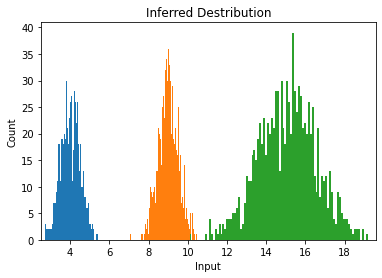

In [24]:
#sig = np.std(GMDXLSX)
#mean = np.mean(GMDXLSX)

N1 = stats.norm.rvs(loc=params["mu0"], scale=params["sigma0"], size=1000)
N2 = stats.norm.rvs(loc=params["mu1"], scale=params["sigma1"], size=1000)
N3 = stats.norm.rvs(loc=params["mu2"], scale=params["sigma2"], size=1000)

# we will limit the graph plus and minus 3*std in order to cover 99% of the the dataset
# while using the lower mean as the start and the higher mean as an end: 
start = np.mean(N1) - 3*params["sigma0"]
end =   np.mean(N3)  + 3*params["sigma2"]
plt.hist(N1,bins=100)
plt.hist(N2,bins=100)
plt.hist(N3,bins=100)


plt.xlim(left = start, right = end)
plt.xlabel("Input")
plt.ylabel("Count")
plt.title("Inferred Destribution")



#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

1) Make 3 random gaussians each with sigma=1 and corresponding mu, from each gaussian genarate equal amounts of random data and concatinate all of in into a sigle data frame

2) Make 3 random gaussians and randomly pick from one of them (equal probability) into a GMD 


#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


Text(0, 0.5, 'Count')

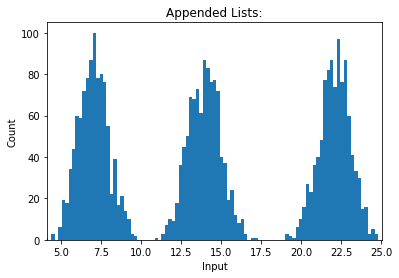

In [25]:
f1 = stats.norm.rvs(size = 1000 , loc = mu1+3,scale = 1)
f2 = stats.norm.rvs(size = 1000 , loc = mu2+5,scale = 1)
f3 = stats.norm.rvs(size = 1000 , loc = round(mu3,5)+7,scale = 1)

GMD = np.append(f1,f2)
GMD = np.append(GMD,f3)

new_start = np.mean(f1) - 3*np.std(f1)
new_end = np.mean(f3) + 3*np.std(f3)

#n, bins, patches = plt.hist(x=f1, bins=100,color='red')
#n, bins, patches = plt.hist(x=f2, bins=100,color='green')
#n, bins, patches = plt.hist(x=f3, bins=100,color='blue')
#plt.title("3 Gaussians:")

n, bins, patches = plt.hist(x=GMD, bins=100)
plt.xlim(left = new_start, right = new_end)
plt.title("Appended Lists:")
plt.xlabel("Input")
plt.ylabel("Count")



#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


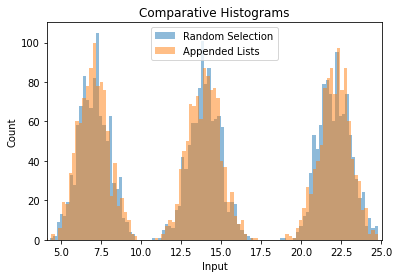

In [26]:
f={}
f[0] = stats.norm.rvs(size = 1000 , loc = mu1+3,scale = 1)
f[1] = stats.norm.rvs(size = 1000 , loc = mu2+5,scale = 1)
f[2] = stats.norm.rvs(size = 1000 , loc = round(mu3,5)+7,scale = 1)

from random import randint

GMD2= []
for i in range(3000):
  GMD2.append(np.random.choice(f[randint(0,2)]))



plt.hist(GMD2, bins = 100, alpha=0.5, label='Random Selection')
plt.hist(GMD, bins = 100, alpha=0.5, label='Appended Lists')
plt.legend(loc='upper center')
plt.title("Comparative Histograms")
plt.xlabel("Input")
plt.ylabel("Count")
plt.xlim(left = new_start, right = new_end)
plt.show()



### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [30]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 70000
sigma = 30000
stats_norm = stats.norm(loc=mu, scale=sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

def draw(vlines, condition, text):
    fig, (ax1) = plt.subplots(1, 1, sharex=True)

    y = stats.norm.pdf(x, mu, sigma)
    ax1.plot(x, y, color='black')
    ax1.fill_between(x, 0, y, where = condition, facecolor='blue', interpolate=True)
    for vline in vlines:
        ax1.axvline(x=vline, color='r')
    ax1.set_xlabel('')

    plt.show()
    print(text)

#### 4.A
What percent of people earn less than 50,000 RCU?

Answer:</br> $X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br> $P(X &lt; 50k) = P(X \le 49999) = CDF(49999) = 0.252$</br>



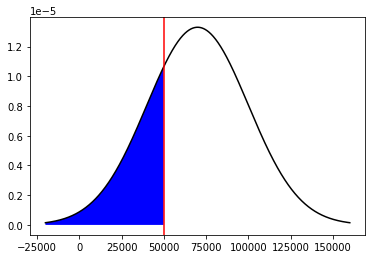

P(X < 50,000 RCU) = 0.252 and so 25.2%


In [32]:
prob=round(stats_norm.cdf(50000), 3)
draw(vlines=[50000], condition=x < 50000, text=f'P(X < 50,000 RCU) = {prob} and so {prob*100}%')

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

Answer:</br> $X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br> $P(45k \le X \le 65k) = P(X \le 65k) - P(X \le 44999) = CDF(65k) - CDF(44999) =   = 0.231$</br>

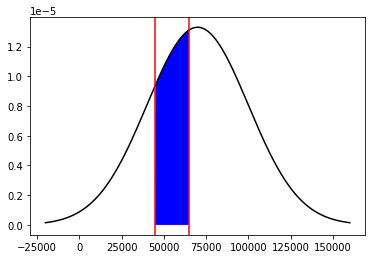

P(65k=>X=>45k)=0.231 and so 23.1%


In [33]:
prob=round(stats_norm.cdf(65000) - stats_norm.cdf(44999),3)
draw(vlines=[45000,65000], condition=(x <= 65000) & (45000 <= x), text=f"P(65k=>X=>45k)={prob} and so {100*prob}%")

#### 4.C
What percent of people earn more than 70,000 RCU?

Answer:</br> $X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br> $P(X &gt; 70k) = 1-P(X \le 70k) = 1 - CDF(70k) = 0.5$</br>

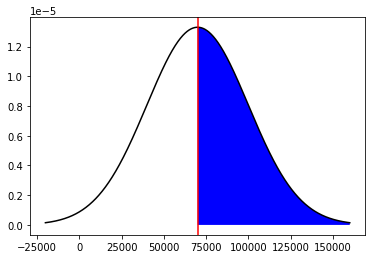

P(X>70k)=0.5, and so 50.0%


In [34]:
prob=round(1-stats_norm.cdf(70000),3)
draw(vlines=[70000], condition=x > 70000, text=f"P(X>70k)={prob}, and so {prob*100}%")

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?


Answer:</br> $X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br> $P(X &gt; 140k) = 1-P(X \le 140k) = 1 - CDF(140k) = 0.01$</br>

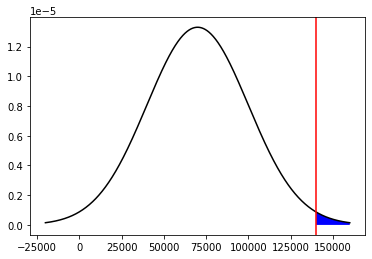

P(X>140k)=0.01, And so I expect that the number of people who earn more than 140k is:10


In [35]:
prob=round(1-stats_norm.cdf(140000),3)
draw(vlines=[140000], condition=x > 140000, text=f"P(X>140k)={prob}, And so I expect that the number of people who earn more than 140k is:{int(prob*1000)}")

#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

Answer: We now define: $Y~Binom(n,p)$</br> Where n=20, $p_{bucket}=P(70k \ge X \ge 50k) = \text{norm.CDF(70k)}-\text{norm.CDF(49999)}$</br> We need to find: $P(Y>10)$

In [36]:
buckets = 20
numPerBucket = 50
mu = 70000
bucket_sigma = sigma/math.sqrt(numPerBucket)
stats_norm = stats.norm(loc=mu, scale=bucket_sigma)

p = stats_norm.cdf(70000) - stats_norm.cdf(49999)
stats_binom = stats.binom(n=buckets,p=p)

print(f'P(Y>10)={round(1-stats_binom.cdf(10),3)}')

P(Y>10)=0.412


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

We solved it in 3 different ways:</br>

1. Empirical</br>
2. Calc harmonic Sum Series</br>
3. Sum of Expectations</br>

In [37]:
# simulate coupon collector's problem

import numpy as np


def calc_expectation_tn_empirical_way_single_iteration(n):
    """
    n: number of different coupons (stamps)
    return: days it took to achieve such goal
    """
    days = 0
    collected = set()
    while True:
        # check if we have enough
        if len(collected) == n:
            break
        # we try to collect stamps
        got = np.random.randint(0, n)  # choose a stamp, randomly 1/n
        days += 1
        collected.add(got)

    return days


def calc_expectation_tn_empirical_way(n, number_of_tries=1000):
    assert(number_of_tries > 0)
    return round(sum([calc_expectation_tn_empirical_way_single_iteration(n) for _ in range(1, number_of_tries + 1)])/number_of_tries, 3)

In [39]:
from fractions import Fraction
from scipy.stats import geom


def calc_expectation_tn_harmonic_series_way(n):
    return round(float(n*sum(Fraction(1, p) for p in range(1, n+1))), 3)


def calc_expectation_tn_stats_lib(n):
    return round(sum([geom.stats(p/n, moments='m') for p in range(1, n+1)]), 3)


print(f"harmonic series way for n=100: {calc_expectation_tn_harmonic_series_way(100)}")
print(f"stats lib way for n=100: {calc_expectation_tn_stats_lib(100)}")
print(f"empirical way for n=100: {calc_expectation_tn_empirical_way(100)}")

harmonic series way for n=100: 518.738
stats lib way for n=100: 518.738


/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


empirical way for n=100: 518.261


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [40]:
from scipy.stats import geom

def calc_variance_tn_stats_lib(n):
    return round(sum([geom.stats(p/n, moments='v') for p in range(1, n+1)]), 3)

print(f"Variance for n=100: {calc_variance_tn_stats_lib(100)}")

Variance for n=100: 15831.101


/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

We will calc $1 - P(T_{20} \le 40)$

Using the convolution formula:

In [41]:
from numpy import convolve


def prob_tn(N=20, K=40):    
    p = (N - np.arange(N)) / N
    
    K_vec = np.arange(K) + 1
    p1 = geom.pmf(K_vec, p[0])

    for current in p[1:]:
        p1 = np.convolve(p1, geom.pmf(K_vec, current))
    
    return round(1 - p1[:K+1-N].sum(), 3)

print(prob_tn(20, 40))

0.964


Using Stirling numbers of the second kind



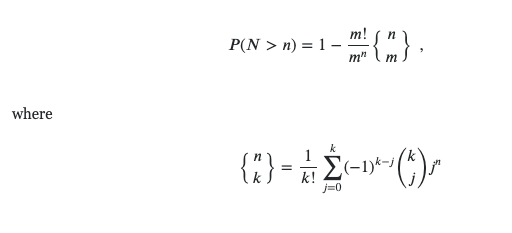


Based on this stackoverflow answer: https://math.stackexchange.com/questions/379525/probability-distribution-in-the-coupon-collectors-problem/1454749#1454749



In [52]:
import math


def prob_tn_stirling(N=20, K=40): 
    n = K
    m = N
    return round(1 - sum([((-1)**(m-j))*comb(m,j)*(j**n) for j in range(0, m+1)])/(m**n), 3)

def comb(x,y):
  return math.factorial(x)/(math.factorial(x-y)*math.factorial(y))    
print(prob_tn_stirling(20, 40))

0.964


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

Answer based on this version of chebicheff bound:</br>

$P(T_{20}>40) = P(T_{20} \ge 41)$

$41 = \mu - b\cdot\sigma \\

\text{ where: } \mu = 71.955, \sigma = 23.8 \Rightarrow b = 1.3 \Rightarrow \mu + b\cdot\sigma = 102.895$

$P(T_{20} \ge 41) \ge P(102.895 \ge T_{20} \ge 41) \ge 1-\frac{1}{1.3^2} = 0.408$

We got here, using chebicheff, the weak lower bound, for Tn of 20 to be more then 40. which is 0.408. in 5.C we calculated that it's actually 0.964. As we can see chebicheff bound holds.

In [49]:
import math 
def chebicheff(N=20,K=40):
    var_Tn = calc_variance_tn_stats_lib(N)
    mean_Tn = calc_expectation_tn_harmonic_series_way(N)
    b = (mean_Tn - (K+1))/math.sqrt(var_Tn)
    print(f"STD: {round(math.sqrt(var_Tn),3)}, Mean:{round(mean_Tn,3)}, b:{round(b,3)}")

    return round(1-1/b**2, 3)

chebicheff(20, 40)

STD: 23.801, Mean:71.955, b:1.301


/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:362: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_discrete_distns.py:363: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


0.409